In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
def fv(p, i, n, t):
    """Returns the future value of an investment
    
    Arguments:
    p -- Initial investment (i.e., present value)
    i -- Interest rate
    n -- Number of times investment is compounded per year
    t -- Total time (in years) of the investment
    """
    return p * (1 + float(i)/n)**(n * t)

In [3]:
def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    # We add 1 to the range of years, so we include the initial
    # investment in our list as well.
    fvs = [fv(p, i, n, year) for year in range(t+1)]
    plt.plot(fvs)

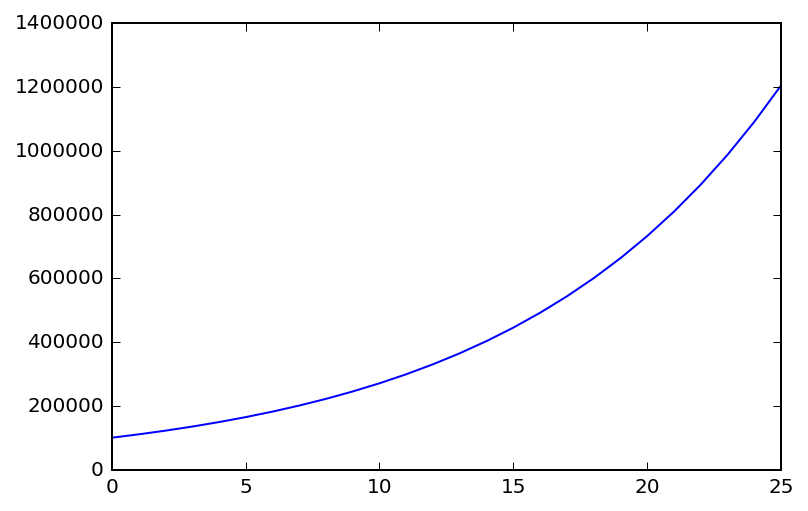

In [4]:
plot_fv(100000, 0.1, 12, 25)

## Adding Some Interactivity

In [5]:
from ipywidgets import interact

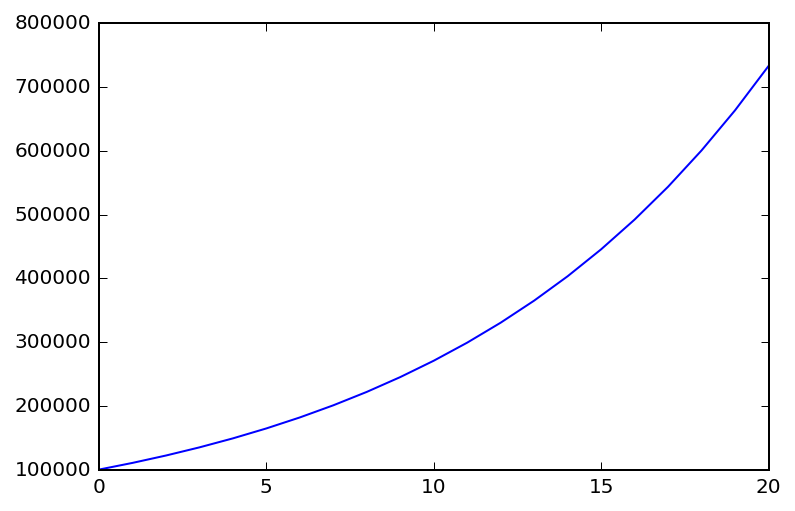

In [6]:
interact(plot_fv, p=100000, i=0.1, n=12, t=20);

### Sensible Limits

This is nice and super easy to use, but we've already seen a few problems. First, we may want to invest more than \$300k initialy, and anything less than a dollar doesn't really make much sense, so we need some different limits on the initial investment parameter. Second, we may want a bit more granularity when choosing an interest rate since right now the rate only moves a tenth of a percent. Compounding at least once a year must happen, so we'll need to change the limits on that parameter as well, especially since choosing zero will result in a "division by zero" error. Finally, the upper bound of 60 years is probably a decent one for the length of our investment, but anything below a year doesn't make any sense at all, so we probably want a lower bound limit on that one as well.

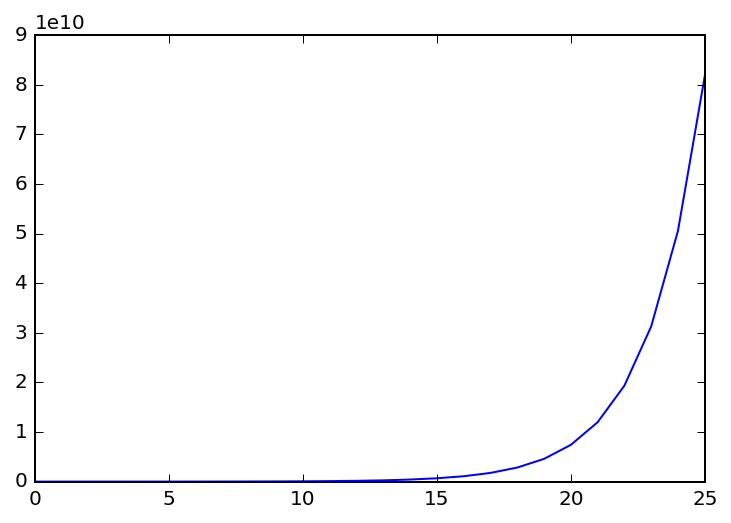

In [7]:
interact(plot_fv, p=(1, 1000000, 1000), i=(0.01, 1.0, 0.01), n=(1, 12), t=(1, 50));

### A Little Finer Control

In [8]:
import ipywidgets

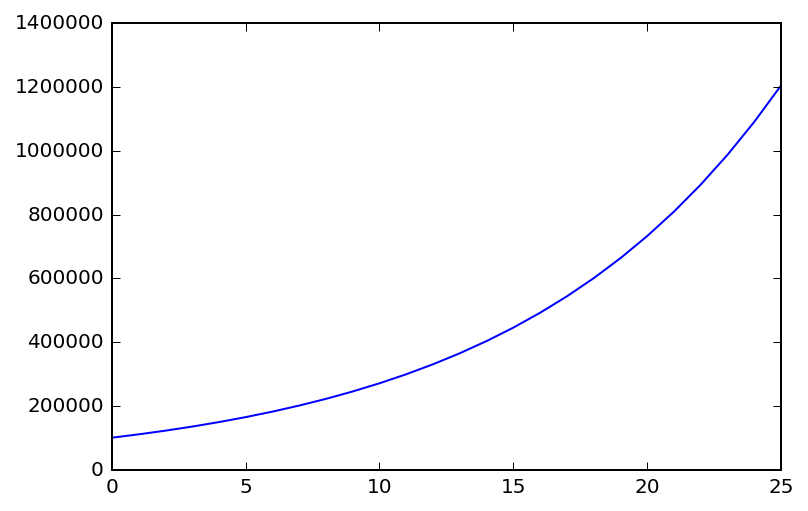

In [9]:
present_value = ipywidgets.IntSlider(min=1, max=1000000, step=1000, value=100000, description='Present Value', continuous_update=False)
interest_rate = ipywidgets.FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description='Interest Rate', continuous_update=False)
compounds_per_year = ipywidgets.IntSlider(min=1, max=12, value=12, description='Compounds/Year', continuous_update=False)
years = ipywidgets.IntSlider(min=1, max=50, value=25, description='Years to Retirement', continuous_update=False)
interact(plot_fv, p=present_value, i=interest_rate, n=compounds_per_year, t=years);

### Making Comparisons 

In [10]:
# Create a figure that we can update instead of creating a new figure 
# every time the plot_fv function is called.
fig = plt.figure()

def plot_fv(p, i, n, t):
    """Plots the value of an investment over time
    """
    # We add 1 to the range of years, so we include the initial
    # investment in our list as well.
    fvs = [fv(p, i, n, year) for year in range(t+1)]

    ax = fig.gca()
    ax.plot(fvs, label="p=%d, i=%2f, n=%d, t=%d" % (p, i, n, t))
    # Add a legend and make sure that it's outside of the plot
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    display(fig)

In [11]:
present_value = ipywidgets.IntSlider(min=0, max=1000000, step=1000, value=100000, description='Present Value:', continuous_update=False)
interest_rate = ipywidgets.FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description='Interest Rate:', continuous_update=False)
compounds_per_year = ipywidgets.IntSlider(min=1, max=12, value=12, description='Compounds/Year:', continuous_update=False)
w = ipywidgets.interactive(plot_fv, p=present_value, i=interest_rate, n=compounds_per_year, t=ipywidgets.fixed(25))

from IPython.display import clear_output
button = ipywidgets.Button(description="Reset")
def clf(*args, **kwargs):
    fig.clf()
    # If we don't call clear_output(), we end up with 2 plots
    clear_output()
    plot_fv(**w.kwargs)
    
button.on_click(clf)
w.children += (button,)

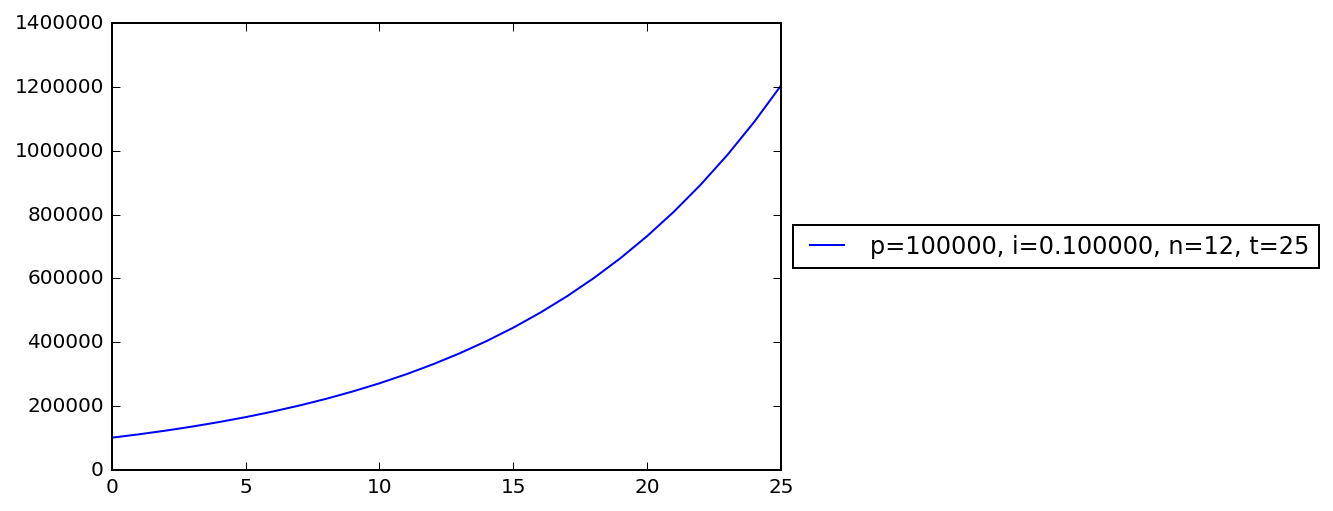

In [12]:
from IPython.display import display
display(w)

## Cleaning Up

In [13]:
%%html
<style>
.widget-hbox .widget-label { min-width: 20ex }  /* Line up all of the sliders */  
.widget-area .btn { margin: 5px 0 0 22ex }      /* Line the button up with the sliders */
</style>

## Adding Regular Deposits

- [Math StackExchange Answer][1]
- [Wikipedia Article on Geometric Progression][2]

[1]: http://math.stackexchange.com/questions/34396/compound-interest-formula-with-regular-deposits-solve-for-time
[2]: https://en.m.wikipedia.org/wiki/Geometric_progression